# GEOGM0058 Practical 7: Atmospheric pollution dispersal as an example of advection and diffusion processes

## i am 12345678


See the accompanying lecture and https://vincivilworld.com/2021/06/20/air-pollution-meteorology-plume-types/ for a brief introduction to pollution plumes

## The advection-diffusion equation

Advanced air quality models such as The Community Multiscale Air Quality Modeling System (CMAQ, https://www.epa.gov/cmaq) model the transport of pollutants through the atmosphere by considering two processes: advection (motion with the background wind direction) and diffusion (mixing in all directions, typically as a result of turbulence). "When pollutants are emitted into the atmosphere from sources like smoke stacks, tailpipes, fires, trees, and dust storms, they are transported by the wind, or advection, and diffused by turbulence. Neither advection nor dispersion change the total pollutant mass concentration, just the spatial distribution. The atmosphere is a generally turbulent environment, especially close to the Earth’s surface, which means it contains several eddies of different length and time scales affecting pollutant transport. In this turbulent environment, mixing and random movement of eddies result in a diffusion-like transport that is orders of magnitude larger than molecular diffusion." (https://www.epa.gov/cmaq/meteorological-process-overview)

Advection and diffusion are conservative processes (just as ice transport in OGGM), so it is perhaps no surprise that the advection-diffusion equation is a conservation equation. 
It models the transport of each pollution species concentration a conserved quantity that varies in three dimensional space and time. we wil consider a single species
with concentration $C(x,y,z,t)$, where $x$ corresponds to the east direction, $y$ to north, $z$ to altitude, and $t$ to time.

$$ \frac{\partial C}{\partial t} + {\bf \nabla} \cdot \left ( {\bf u} C - D \bf{\nabla} C \right ) = S  $$

As usual, the trick is to know how to read it without being intimidated by the estoteric symbols. It says that the pollution concentration in a given volume changes
only if there is a net flux into or out of the volume through its bounding surface, or if there is a source of pollution (e.g a smoke stack or road) within the volume.
The flux includes two processes: advection and diffusion.
In more detail, 

* $\frac{\partial C}{\partial t} $ is the rate of change with time of the pollution concentration $C(x,y,z,t)$ at a fixed point $(x,y,z)$. 
* ${\bf \nabla} \cdot \left ( {\bf u} C - D \bf{\nabla} C \right )$ is the flux divergence, with the flux $\bf{q} = {\bf u} C - D \bf{\nabla} C$. 
* The advection part of the flux (${\bf u} C$) is simply pollution concentration that is carried along with the vector ${\bf u}$, which represents the large scale flow of air. These currents can vary in space (e.g the wind is faster at higher altitude). We will keep it simple and have a constant, horizontal wind, but the methods we will use apply more generally.
* The diffusion part ($- D \bf{\nabla} C$). is a flux that is proportional to the concentration gradient $\bf{\nabla} C$, and is directed from strong toward weak concentration. $D$ is called is the diffusion coefficient: it can vary in space, and even differ depending on direction,  but we will assume it does not for simplicity.
* Finally, $S(x,y,z,t)$ is a source term used to represent the sources of pollution (e.g chimney stacks,  roads). It could also be used to model chemical reactions such as the conversion of NOx to Ozone.

Equations like this one are common to many environmental models. For example the transport of heat and salinity by ocean currents is modelled with advection-diffusion equations, likewise the motion of heat in the atmosphere. Even the Navier-Stokes equation, and the many approximations to it that are used to model the air and ocean currents themselves are (admittedly more difficult) advection-diffusion equations.

The advection-diffusion equation above is not on its own a complete specification of the problem. As it stands, there will be an infinite variety of $C(x,y,z,t)$ that satisfy the equation. To select a unique solution, we need also to specify initial and boundary conditions. 

The required initial condition is a complete field of concentratration at one time, which will usually be time $t = 0$. In other words, we need to specify $C(x,y,z, t = 0)$. For pollution modelling the obvious initial condition is $C(x,y,z, t = 0) = 0 $ everywhere, or some background level that is know. We then 'switch on' our pollution sources at $t = 0$. An important approach in many fields (e.g glacier modelling, climate modelling) will look for an equilibrium or long term solution that does not depend on the initial conditions, and use that as the initial condition for chmnage experiments. 

Boundary conditions must be specified at (surprise!) the domain boundaries at all times. For example, at the ground surface we need to specify 
either $C(x,y,z=0,t)$, $\frac{\partial C}{\partial z}(x,y,z=0)$ or a relationship between the two for all modelled $x,y,t$.
 * Specification of  $C(x,y,z=0,t)$ is known as a Dirchlett condition. 
 * Specification of $\frac{\partial C}{\partial z}(x,y,z=0, t)$ is called a Neumann condition. 
 * Specification of a relationship between $C(x,y,z=0,t)$ and $\frac{\partial C}{\partial z}(x,y,z=0, t)$  is called a Robin condition.

Boundary conditions are key and should be considered carefully. For example, at the ground we might set $\frac{\partial C}{\partial z}(x,y,z=0, t) = 0$. 
The result resembles a mirror at the ground, and physically corresponds to no deposition of pollutants (and no pollutants passing through the ground).



## Exercise 7.1. Numerical modelling of diffusion

We will model the diffusion of pollution into a 10km long, 1km high region  of a two-dimensional atmosphere (known as a domain), with constant diffusion coefficient $D$. Points inside the region have coordinates $(x, z)$. The pollution originates at a point source.  Modelling a two dimensional atmosphere is somewhat artificial, but we will do so to reduce the computational effort (the time taken to complete the calculations). The basic approach is the same in 2D and 3D models, but a point in 2D is equivalent to an infinite line in 3D. We could think of our 2D point source as something like a motorway heading in the $y$ direction.

### Boundary conditions

 * At the ground we set $\frac{\partial C}{\partial z}(x,z=1~\rm{ km},t) = 0$ (no deposition).
 * At top of our domain we will explore the effect of two different boundary conditions. 
    1. $C(x,z=1~\rm{ km}, t = 0) = 0$. The result is that any pollution that travels to $z = 1~{\rm km}$ leaves the domain and never returns. This is a reasonable approximation
 for local pollution modelling in a neutrally stable or unstable atmosphere.
     2. $\frac{\partial C}{\partial z}(x,z=1~\rm{ km},t) = 0$. This resembles a mirror at the top of the domain and represents an inversion. 

 * At west end of the domain we set ${C}(x=0,z, t = 0)=0$. Pollution that reaches the west end vanishes.
 * At east end of the domain we set ${C}(x=10~\rm{km},z, t = 0)=0$. Pollution that reaches the east end vanishes.

### Discretization

To find a numerical solution to the (advection-)diffusion equation, we need to *discretize* it. There are two main approaches to discretization: finite volume methods, and finite element methods. Both require us to represent the continuous field $C(x,z)$ on a *mesh* or grid. We will look at at finite volume methods, which are easier to understand and focus on conservation equations. In particular, finite volume methods are designed to ensure conservation of $C$ no matter how coarse the mesh. Finite element methods are more widely applicable and often more accurate but will have a conservation error that is greater when the mesh is coarse. In other words, a finite element method might leak pollution, or gain it from nowhere. 

### Finite Volume Methods

Finite volume methods work by dividing the modelled region into *cells* of (ahem) finite volume, then working out formulae relating the rate of change with respect to time of the total $C$ within in each cells to the flux of $C$ through each cell surface. The fluxes are specified such that the flux of $C$ out of one cell is routed into other cells. We will employ the simplest method, which divides the modelled region into $N = N_x \times N_z$ rectangular cells, each of which is $\Delta x$ metres long and $\Delta z$ metres high. 

<img width="640" alt="finite volume mesh" src="fvgrid.svg">

The diagram above shows a portion of the mesh around a typical cell labelled 'P', which has neighbours labelled 'E', 'W', 'U', 'D' (East, West, Up, Down). In each cell, we store a single value of $C$ at the  cell centre, which we label $C_{\rm P}$, $C_{\rm W}$, $C_{\rm E}$, etc. 

The advection equation is integrated over each cell to give $N$ ordinary differential equations. If we integrate over the cell $P$ (which can represent *any* cell) we get
$$ \frac{d C_P}{d t} \Delta x \Delta z +  F_e - F_w + F_u - F_d  = S_{\rm P}\Delta x \Delta z  + {\rm error}$$
where the error is small and is smaller when the mesh is finer. The fluxes $F_e$ are defined at the cell faces ($e$ is the face between cell $P$ and cell $E$).
If we integrate over the cell $E$, we get
$$ \frac{d C_E}{d t} \Delta x \Delta z - F_e + {\rm other~fluxes} = S_E\Delta x \Delta z  + {\rm error.}$$
That is, the flux $F_e$ leaves cell $P$ and enters cell $E$. 
The source term $S_{\rm P}\Delta x \Delta z $ is the rate of pollution added to cell $P$ per unit time by all pollution sources inside the cell.

In our 'diffusion-only' case, the fluxes are all similar. For example, the flux $F_e$ is 
$$F_e = - D \frac{\partial C}{\partial x} \left( x_{\rm e} , z_{\rm P} \right) \Delta z  + {\rm error.}$$
In words: the diffusion coefficient multiplied by the height of the cell face and the concentration gradient $\frac{\partial C}{\partial x}$ evaluated at the midpoint of face $e$, that is midway between points $P$ and $E$. We now need an approximation for $\frac{\partial C}{\partial x}$ and we will use the *central difference scheme*, giving
$$F_e = - D  \frac{ C_{\rm E} - C_{\rm P}}{\Delta x}  \Delta z  + {\rm error}  $$. The central difference scheme is analogous to the midpoint rule
we used in the calculus practical: it is *second-order accurate* in space. 

We now have a set of $N$ coupled ordinary differential equations in the $C_{\rm P}$, $C_{\rm W}$, $C_{\rm E}$ etc, and we need to evolve them in time.
We could use any of the ODE methods we looked at in previous weeks, but for simplicity we will use the forward Euler method, so that.

$$ C^{k+1}_{\rm P} = C^k_{\rm P} + \frac{\Delta t}{\Delta x \Delta z} ( F^k_w - F^k_e + F^k_d - F^k_u) + \Delta t S^k_{\rm P} + {\rm error}$$

The superscript $k$ means the value at the start of time-step $k$, i.e $C^k_{\rm P}$ is the value for $C$ at the centre of cell $P$ at the start of
time step $k$ (where time $t = t^k)$ and  $C^{k+1}_{\rm P}$ is the value at the end of time step $k$ and hence at the start of time step $k+1$.
The resulting algorithm is implemented in the function `euler_advection_diffusion_timestep` in `pollution.py`. 

To complete our method, we need to include the boundary and initial conditions.
We need to modify the fluxes at the edges of the domain to satisfy the boundary conditions. For example, 
at the ground we set need to set $F_d = 0$. The function `euler_advection_diffusion_timestep`
acheives this by placing particular values into  *halo* (or *ghost*) cells surrounding the modelled domain.
A typical initial condition would set $C_P = 0$ everywhere at the start of the simulations, 
as if the pollution source was switched on for the first time at time $t = 0$. 

The code cell below uses the function `transport_pollution` (in `pollution.py`) to simulate pollution emitted from a point source located at $(x = 2~{\rm km}, z = 50~{\rm m})$ 
over the course of one hour. Run the cell to see  a figure with five panels. The top three panels show colormaps of the pollution concentration at the start, middle and end of the simulations. The lower panels show time series of the pollution concentration at several points on the ground, and plots of the ground level pollution at several points in time. 



C:\Users\we24270\OneDrive - University of Bristol\Documents\2. Course (EMDA)\4. TB1\1. GEOGM0058\3. Assessment [wc 9-Dec]\3. Labs\W8 - Atmospheric Dispersion\pollution.py:193: SyntaxWarning: invalid escape sequence '\m'
  fig.colorbar(im, cax=cbar_ax, label='$C$ ($\mu$ g / m$^3$)')


3600 second simulation requires ~ 3636 steps: stable timestep dt = 0.9900867563520258
progress: time = 60.0 / 3600
progress: time = 420.0 / 3600
progress: time = 780.0 / 3600
progress: time = 1140.0 / 3600
progress: time = 1500.0 / 3600
progress: time = 1860.0 / 3600
progress: time = 2220.0 / 3600
progress: time = 2580.0 / 3600
progress: time = 2940.0 / 3600
progress: time = 3300.0 / 3600
3600 second simulation complete
plotting output...


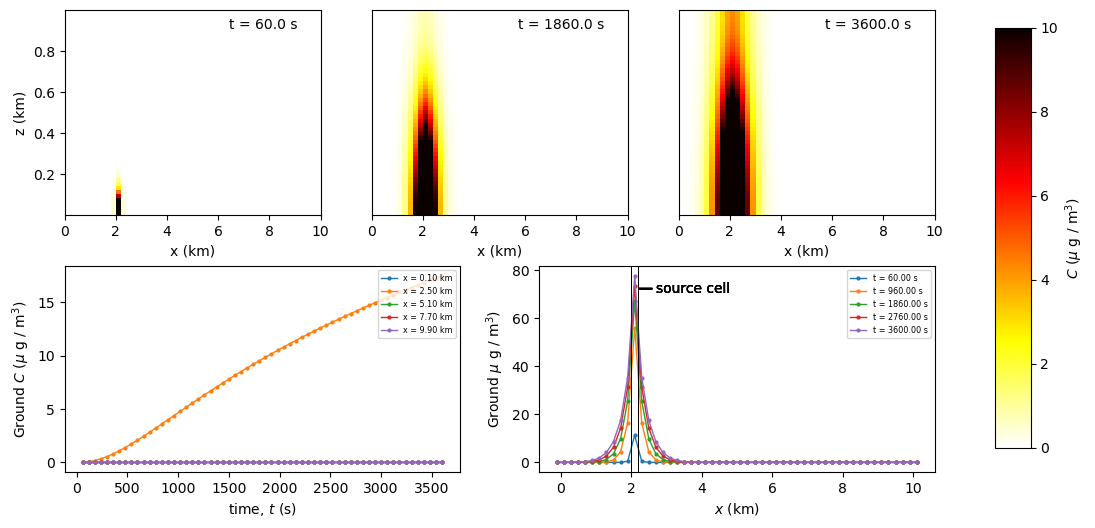

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pollution import transport_pollution, plot_pollution

# Turbulent diffusion coefficient (km^2 / s)
D = 50.0 * 1.0e-6
#wind speed (km / sec)
U = 0.0 * 1.0e-3
#mesh resolution (10 x resolution in z)
dx_per_km = 5
#modelled region (km)
width_height_km = (10.0, 1.0)
#location of pollution source (km from domain west/low point)
stack_x_z = (2.0, 0.05) 
#rate ot emission from stack (micrograms / second)
stack_emission = 5.0e+3

#total time for simulation
sim_time = 3600

x, z, time, conc = transport_pollution(sim_time, dx_per_km, width_height_km, stack_x_z, stack_emission, D, U, inversion=True)
print('plotting output...')
plot_pollution(x, z, time, conc, stack_x_z)



### Exercise 7.1, continued

Experiment with the code cell above to investigate the following points.

* The pollution should spread out at an equal rate in all directions: east, west, up, and down. Does it? Try moving the source by altering `stack_x_z` to see the impact of the boundaries.
* Is the system close to equilibrium by the end of the 3600 second simulation? If not, try a longer simulation.
* How can the system ever be in equilibrium while the pollution source emits pollution?
* How is the system equilibrium changed when an inversion is placed at the top boundary (set `inversion=True` rather than `inversion=False`)



### Note 7.1 : Explicit versus implicit methods.

The time-stepping method we used above is an *explicit* method, similar to the Euler method we saw in the calculus practical. This is simple to implement, but requires timesteps that shrink  as the mesh becomes finer. In 1D, the timestep $dt$ must be chosen to satisfy 

$$ \Delta t \leq \frac{\Delta x^2 }{ 2 D } .$$

A similar criterion applies in 2D and 3D. Try setting a finer mesh resolution (increase `dx_per_km` to 10) to see that $\Delta t$ is reduced from around $1~{\rm s}$ to around $1/4~{\rm s}$ 

The factor $\Delta x^2$ means that the computational effort needed for a simulation over a given time grows quickly as the mesh is refined. In 1D, it will grow proportional to $N^3$ (the cube of the number of cells). In 2D, it will grow proportional to $N^2$. In 3D, it will grow proportional to $N^{5/3}$. The usual way to address this is to implement an implicit scheme. The simplest implicit scheme is (as in practical 3) the backward Euler scheme, which in this case amounts to solving $N$ simultaneous linear algebra equations. most of which look like this:

$$ C^{k+1}_{P}(1 + \frac{2 D \Delta t }{\Delta x^2} + \frac{2 D \Delta t} {\Delta z^2} ) - C^{k+1}_{W}\frac{D \Delta t }{ \Delta x^2} - C^{k+1}_{E}\frac{D \Delta t }{ \Delta x^2}
 - C^{k+1}_{D}\frac{D \Delta t }{ \Delta z^2} - C^{k+1}_{U}\frac{D \Delta t }{\Delta z^2}  = C^{k}_{P} + \Delta t S^{k+1}_{P} $$
 
You might be familiar with the Gaussian elimination methods of solving simultaneous linear algebra equations. If the name is unfamiliar, you almost certainly did this at school: think how you would find $x$ and $y$ in 

$$ x - y = 1$$
$$ 3x + 2y = 3$$

We have $N$ independent equations in $N$ variables, so a unique solution exists and can be found by mechanical operations. The problem is that the computational cost of solving the problem using Gaussian elimination grows proportional to $N^3$, which would be worse than the explicit method. However, there are techniques that take advantage of the *sparse* structure of the equations (each equation features only the variables associated with neighbour cells) to improve on the explicit method. We will not cover these, but keep it in mind if you ever need develop your own finite volume or finite element model.


## Exercise 7.2. Numerical modelling of advection

If we set the diffusion coefficient $D = 0$ and set the wind vector ${\bf u} = (U,0)$, where the horizontal wind speed $U > 0$, pollution is transported by horizontal advection alone. We now need to compute the
advective fluxes $U C $ at the $e$-faces of each of our cells. Since we store only cell center values $C_{\rm P}$ at the
we need a formula for $C(x_{\rm e}, z_{\rm P})$. The obvious formula is linear interpolation: 

$$ C(x_{\rm e}, z_{\rm P}) = \frac{1}{2} ( C_{\rm P} + C_{\rm E} )$$

Like the central-difference scheme we used for diffusion, this will be second order accurate in space. The code cell below runs the simulation with this formula, and you should see straight away that it has some problems: large amplitude oscillations that grow over time and impossible negative concentrations. The scheme is unconditionally unstable: we cannot even make it work with a smaller time step.




1800 second simulation requires ~ 72 steps: stable timestep dt = 24.99999937500002
progress: time = 60.0 / 1800
progress: time = 240.0 / 1800
progress: time = 420.0 / 1800
progress: time = 600.0 / 1800
progress: time = 780.0 / 1800
progress: time = 960.0 / 1800
progress: time = 1140.0 / 1800
progress: time = 1320.0 / 1800
progress: time = 1500.0 / 1800
progress: time = 1680.0 / 1800
1800 second simulation complete
plotting output...


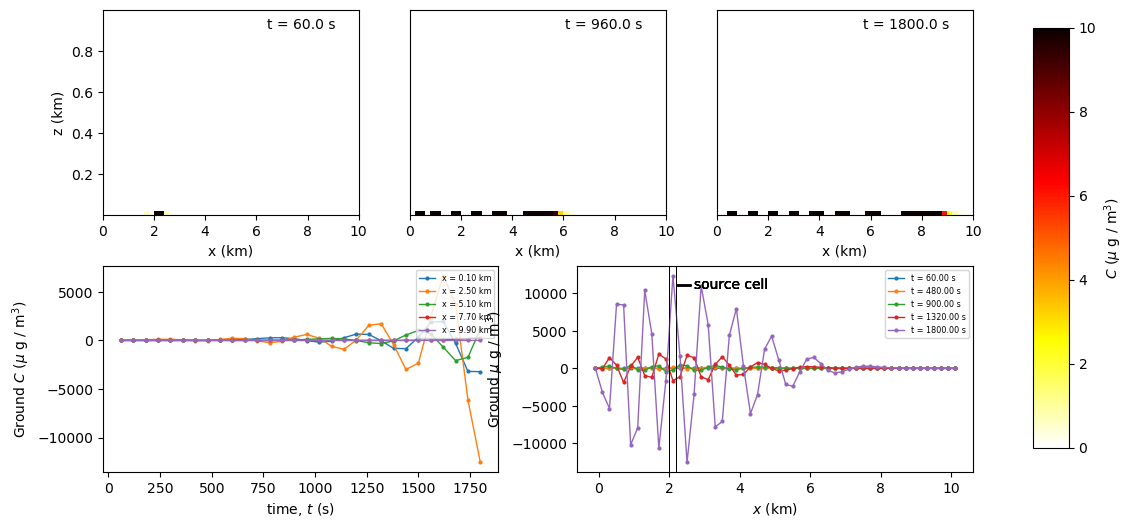

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pollution import transport_pollution, plot_pollution

# Turbulent diffusion coefficient (km^2 / s)
D = 0.0 * 1.0e-6
#wind speed (km / sec)
U = 4.0 * 1.0e-3
#mesh resolution (10 x resolution in z)
dx_per_km = 5
#modelled region (km)
width_height_km = (10.0, 1.0)
#location of pollution source (km from domain west/low point)
stack_x_z = (2.0, 0.0005) 
#rate ot emission from stack (micrograms / second)
stack_emission = 5.0e+3

#total time for simulation
sim_time = 1800

x, z, time, conc = transport_pollution(sim_time, dx_per_km, width_height_km, stack_x_z, stack_emission, D, U, inversion=True, upwind=False)
print('plotting output...')
plot_pollution(x, z, time, conc, stack_x_z)


## Exercise 7.2 continued

A (quite old!) solution to the osscillation problem is the first order *upwind* scheme. In this case we set

$$ U C(x_{\rm e}, z_{\rm P})  = \max(U, 0)  C_{\rm P} + \min(U, 0)  C_{\rm E} $$

That is, the value in the cell upwind of the $e$-face. This makes some intuitive sense: the concentration at the cell face will come from upstream and not downstream. It is also conditionally stable: we can use our explicit time-stepping scheme provided that $\Delta t < \Delta x / U$: this is called the Courant–Friedrichs–Lewy (CFL) condition. Set `upwind=True` and re-run the cell above to see the result. 

Before moving on, experiment with the code cell above  to investigate the following points.
* The pollution should move in a straight line with no up or down mixing. Does it?
* The curves in the bottom panels should resemble sharp steps, but instead look like worn steps (and look more worn at later times). The steps become sharper if the mesh resolution is finer (increase `dx_per_km`)

The solution now has no strange oscillations. It behaves in roughly the right way in this case, with pollution moving along the bottom cells with the wind and no evidence of vertical mixing. But there does appear to be horizontal mixing. The pollution should move in the x-direction with a sharp front, but instead there us a progressive blurring (the worn step appearance). This is *numerical diffusion*. To reduce the numerical diffusion, make the mesh finer - but note that it reduces only very slowly. Addressing numerical diffusion in advection problems is quite complicated. For example, there are higher-order upwind schemes with complicated formulae. We will accept the numerical diffusion and move on, but be aware of this problem if you ever need to work with advection models.




## Exercise 7.3. Combining advection and diffusion

The code cell below includes both advection and diffusion. Run the cell to see the combined effect: a plume of pollution that is carried downwind while mixing vertically, so that regions downwind experience substantially less pollution than regions close to the source. 


3600 second simulation requires ~ 3636 steps: stable timestep dt = 0.9900867563520258
progress: time = 60.0 / 3600
progress: time = 420.0 / 3600
progress: time = 780.0 / 3600
progress: time = 1140.0 / 3600
progress: time = 1500.0 / 3600
progress: time = 1860.0 / 3600
progress: time = 2220.0 / 3600
progress: time = 2580.0 / 3600
progress: time = 2940.0 / 3600
progress: time = 3300.0 / 3600
3600 second simulation complete
plotting output...


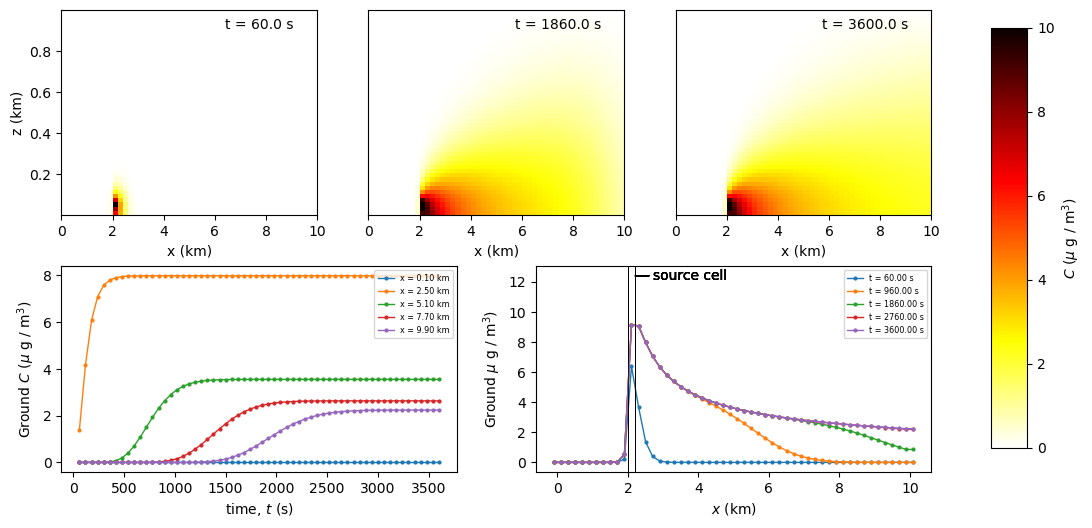

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from pollution import transport_pollution, plot_pollution

# Turbulent diffusion coefficient (km^2 / s)
D = 50.0 * 1.0e-6
#wind speed (km / sec)
U = 4.0 * 1.0e-3
#mesh resolution (10 x resolution in z)
dx_per_km = 5
#modelled region (km)
width_height_km = (10.0, 1.0)
#location of pollution source (km from domain west/low point)
stack_x_z = (2.0, 0.05) 
#rate ot emision from stack (micrograms / second)
stack_emission = 5.0e+3

#total time for simulation
sim_time = 3600

x, z, time, conc = transport_pollution(sim_time, dx_per_km, width_height_km, stack_x_z, stack_emission, D, U, upwind=True,inversion=False)
print('plotting output...')
plot_pollution(x, z, time, conc, stack_x_z)

### Exercise 7.3. continued

Consider the following points.
* Is any pollution carried upstream from the source? If so, is this an error?
* Is the system close to equilibrium? If not, increase the simulation time.
* What is the effect of the inversion at $z =  1~{\rm km}$?  
* How does that compare to an inversion at  $z =  0.3~{\rm km}$? (set `width_height_km = (10.0, 0.3)`)
* Is the location of maximum ground level pollution upstream, downstream, or directly beneath the point source? 
* How does that location relate to the height of the pollution source. Set `stack_x_z = (2.0, 0.25)` to investigate.
* What is the effect of mesh refinement (increase `dx_per_km`)? 
* Switch the advection method to the central scheme (`upwind=False`). You should see that oscillations appear, but they shrink and eventually vanish as the mesh is refined. As long as there
is some real diffusion and the mesh is fine enough, this scheme is more accurate than the upwind scheme. Are larger but hidden errors (numerical diffusion) better or worse than obvious small errors (the oscillations)? 


## Exercise 7.4. Gaussian Plumes

<a title="BMacZero, Public domain, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Gaussian_Plume_(SVG).svg"><img width="512" alt="Gaussian Plume (SVG)" src="Gaussian_Plume.svg"></a>

Many commercial and government tools for air pollution modelling avoid the practical difficulties in numerical modelling of advection and diffusion, relying instead on an approximate solution to the advection-diffusion equation. The Gaussian plume models assume that turbulent diffusion con be neglected in the $x$ (down wind) direction, and that the pollution originates from one or more point sources (chminey stacks). This allows an analytic solution - an explicit formula for the pollution concentration at any point in space, which resembles the Gaussian probability distribution in statistics (hence the name). 

Extensions to the model include time-variation (puff models) and line sources (such as roads). Well known examples include the AERMOD (widely used in the USA) and ADMS models. See https://en.wikipedia.org/wiki/Atmospheric_dispersion_modeling for more details.